In [13]:
import pandas as pd #for data manipulation
import numpy as np #for maniplulating arrays
from matplotlib import pyplot as plt #for data visualization 
import seaborn as sns #for data visualization
import datetime as dt #for date manipulation

In [4]:
#importing the dataset
covid19_df = pd.read_csv("D:/COVID-19-Analysis-master/datasets/covid_19_india.csv")
individuals_df = pd.read_csv("D:/COVID-19-Analysis-master/datasets/IndividualDetails.csv")

In [5]:
excel_file = pd.ExcelFile("D:/COVID-19-Analysis-master/datasets/Indian States Population and Area.xlsx")
indian_states_df = excel_file.parse('Sheet1')

In [6]:
covid19_df.head() #display the first 5 rows

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [7]:
covid19_df.tail() #display the last 5 rows

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1313,1314,25/04/20,5:00 PM,Telengana,-,-,253,26,984
1314,1315,25/04/20,5:00 PM,Tripura,-,-,1,0,2
1315,1316,25/04/20,5:00 PM,Uttarakhand,-,-,25,0,48
1316,1317,25/04/20,5:00 PM,Uttar Pradesh,-,-,248,26,1778
1317,1318,25/04/20,5:00 PM,West Bengal,-,-,103,18,571


In [8]:
covid19_df.shape # Check for dimesion of the table

(1318, 9)

In [9]:
covid19_df.isna().sum() # Check for missing values

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [10]:
covid19_df_latest = covid19_df[covid19_df['Date']=="25/04/20"] #Filter by date - 25/4/19
covid19_df_latest.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1286,1287,25/04/20,5:00 PM,Andaman and Nicobar Islands,-,-,11,0,27
1287,1288,25/04/20,5:00 PM,Andhra Pradesh,-,-,171,31,1061
1288,1289,25/04/20,5:00 PM,Arunachal Pradesh,-,-,1,0,1
1289,1290,25/04/20,5:00 PM,Assam,-,-,19,1,36
1290,1291,25/04/20,5:00 PM,Bihar,-,-,46,2,228


In [11]:
covid19_df_latest['Confirmed'].sum()

24893

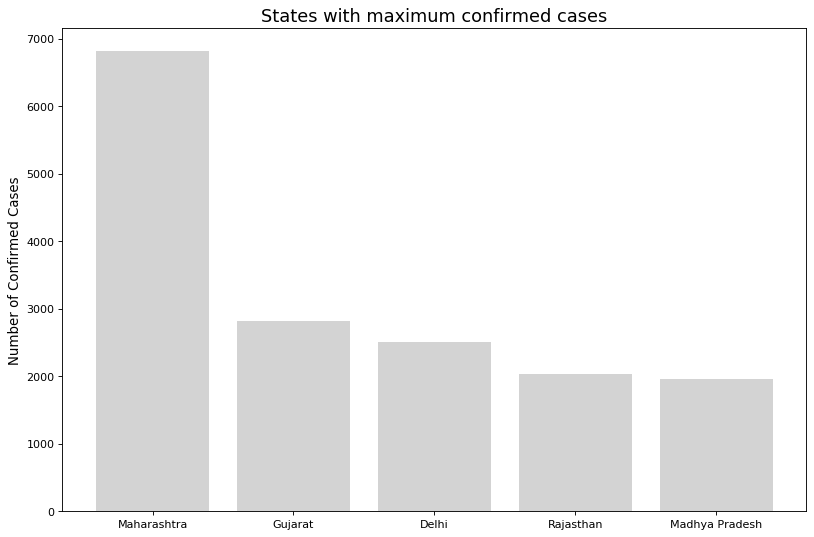

In [14]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5], covid19_df_latest['Confirmed'][:5],
        align='center',color='lightgrey')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('States with maximum confirmed cases', size = 16)
plt.show()

In [15]:
covid19_df_latest['Deaths'].sum()

779

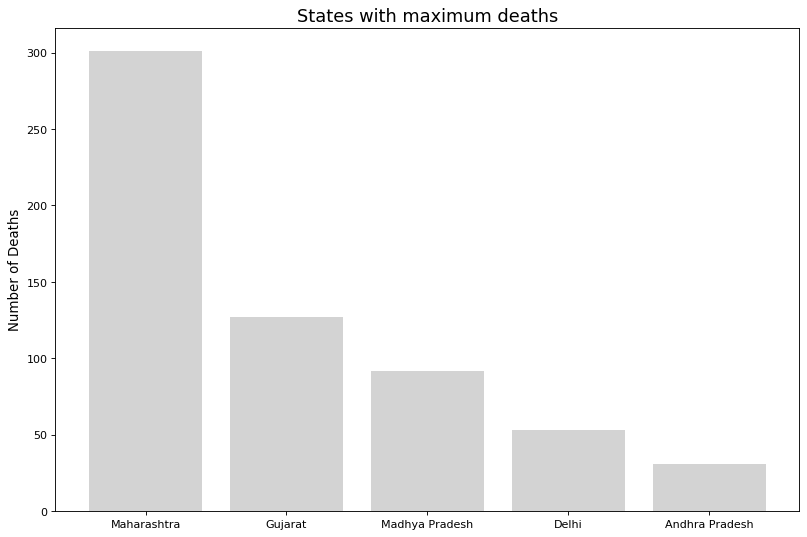

In [16]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5], covid19_df_latest['Deaths'][:5], align='center',color='lightgrey')
plt.ylabel('Number of Deaths', size = 12)
plt.title('States with maximum deaths', size = 16)
plt.show()

In [17]:
covid19_df_latest['Deaths/Confirmed Cases'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Deaths']).round(2)
covid19_df_latest['Deaths/Confirmed Cases'] = [np.nan if x == float("inf") else x for x in covid19_df_latest['Deaths/Confirmed Cases']]
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths/Confirmed Cases'], ascending=True, na_position='last')
covid19_df_latest.iloc[:10]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Deaths/Confirmed Cases
1306,1307,25/04/20,5:00 PM,Meghalaya,-,-,0,1,12,12.00
1310,1311,25/04/20,5:00 PM,Punjab,-,-,67,17,298,17.53
1299,1300,25/04/20,5:00 PM,Jharkhand,-,-,9,3,59,19.67
1303,1304,25/04/20,5:00 PM,Madhya Pradesh,-,-,210,92,1952,21.22
1295,1296,25/04/20,5:00 PM,Gujarat,-,-,265,127,2815,22.17
1304,1305,25/04/20,5:00 PM,Maharashtra,-,-,957,301,6817,22.65
1300,1301,25/04/20,5:00 PM,Karnataka,-,-,153,18,489,27.17
1317,1318,25/04/20,5:00 PM,West Bengal,-,-,103,18,571,31.72
1287,1288,25/04/20,5:00 PM,Andhra Pradesh,-,-,171,31,1061,34.23
1289,1290,25/04/20,5:00 PM,Assam,-,-,19,1,36,36.00


In [18]:
indian_states_df.head()

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362


In [19]:
covid19_df_latest = covid19_df_latest.drop(['Sno','Date','Time','ConfirmedIndianNational','ConfirmedForeignNational'], axis = 1)
covid19_df_latest.shape

(32, 5)

In [21]:
indian_states_df = indian_states_df[['State', 'Aadhaar assigned as of 2019']]
indian_states_df.columns = ['State/UnionTerritory', 'Population']
indian_states_df.head()

,State/UnionTerritory,Population
0,Delhi,21763471
1,Haryana,28941133
2,Kerala,36475649
3,Himachal Pradesh,7560770
4,Punjab,30355185


In [22]:
covid19_df_latest = pd.merge(covid19_df_latest, indian_states_df, on="State/UnionTerritory")
covid19_df_latest['Cases/10million'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Population'])*10000000
covid19_df_latest.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population,Cases/10million
0,Meghalaya,0,1,12,12.00,978281,122.664143
1,Punjab,67,17,298,17.53,30355185,98.171037
2,Jharkhand,9,3,59,19.67,34607477,17.048339
3,Madhya Pradesh,210,92,1952,21.22,74770270,261.066330
4,Gujarat,265,127,2815,22.17,62097024,453.322852


In [23]:
covid19_df_latest.fillna(0, inplace=True)
covid19_df_latest.sort_values(by='Cases/10million', ascending=False)


,State/UnionTerritory,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population,Cases/10million
12,Delhi,857,53,2514,47.43,21763471,1155.146622
22,Ladakh,14,0,20,0.00,210156,951.673995
5,Maharashtra,957,301,6817,22.65,114063427,597.649937
4,Gujarat,265,127,2815,22.17,62097024,453.322852
14,Rajasthan,230,27,2034,75.33,68936999,295.052008
3,Madhya Pradesh,210,92,1952,21.22,74770270,261.066330
10,Telengana,253,26,984,37.85,39184011,251.122837
21,Chandigarh,15,0,28,0.00,1131522,247.454314
15,Tamil Nadu,866,22,1755,79.77,72344821,242.588201
8,Andhra Pradesh,171,31,1061,34.23,49145456,215.889746


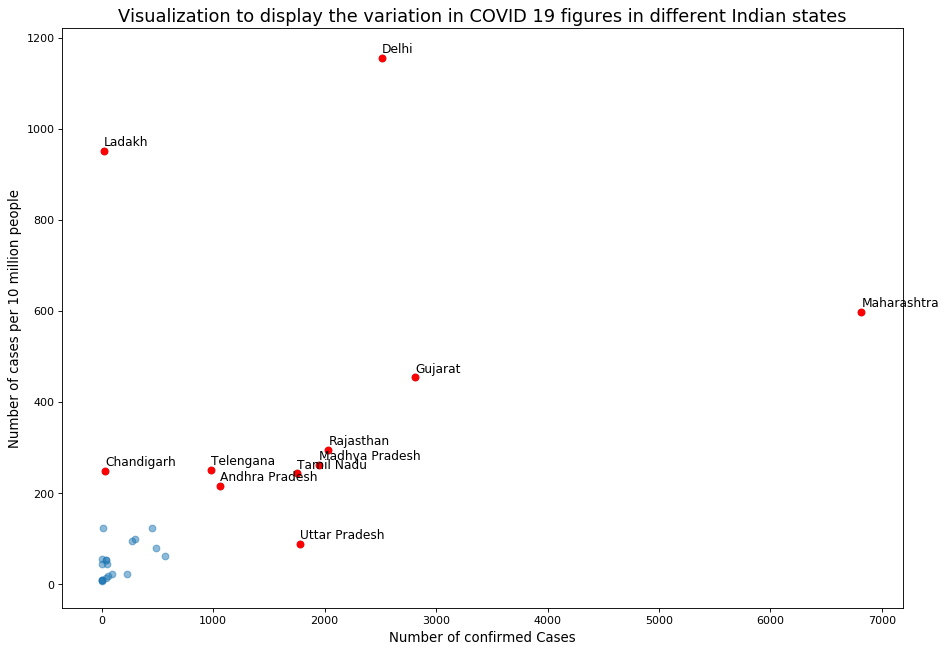

In [24]:
df = covid19_df_latest[(covid19_df_latest['Confirmed']>=1000) | (covid19_df_latest['Cases/10million']>=200)]
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(covid19_df_latest['Confirmed'], covid19_df_latest['Cases/10million'], alpha=0.5)
plt.xlabel('Number of confirmed Cases', size=12)
plt.ylabel('Number of cases per 10 million people', size=12)
plt.scatter(df['Confirmed'], df['Cases/10million'], color="red")
for i in range(df.shape[0]):
    plt.annotate(df['State/UnionTerritory'].tolist()[i], xy=(df['Confirmed'].tolist()[i], df['Cases/10million'].tolist()[i]),
                xytext = (df['Confirmed'].tolist()[i]+1.0, df['Cases/10million'].tolist()[i]+12.0), size=11)
plt.tight_layout()    
plt.title('Visualization to display the variation in COVID 19 figures in different Indian states', size=16)
plt.show()

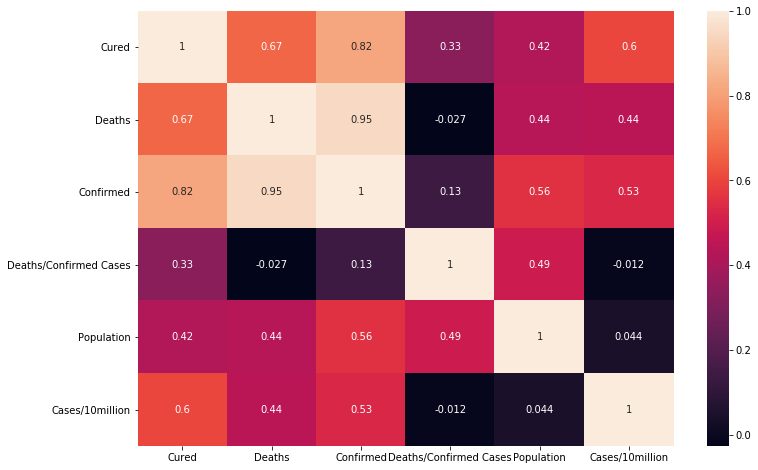

In [25]:
plt.figure(figsize = (12,8))
sns.heatmap(covid19_df_latest.corr(), annot=True)

In [26]:
individuals_df.isna().sum()
individuals_df.iloc[0]

id                                       0
government_id                     KL-TS-P1
diagnosed_date                  30/01/2020
age                                     20
gender                                   F
detected_city                     Thrissur
detected_district                 Thrissur
detected_state                      Kerala
nationality                          India
status_change_date              14/02/2020
notes                 Travelled from Wuhan
Name: 0, dtype: object

In [27]:
individuals_grouped_district = individuals_df.groupby('detected_district')
individuals_grouped_district = individuals_grouped_district['id']
individuals_grouped_district.columns = ['count']
individuals_grouped_district.count().sort_values(ascending=False).head()

detected_district
Mumbai       2268
Ahmadabad    1192
Indore        841
Pune          591
Jaipur        578
Name: id, dtype: int64

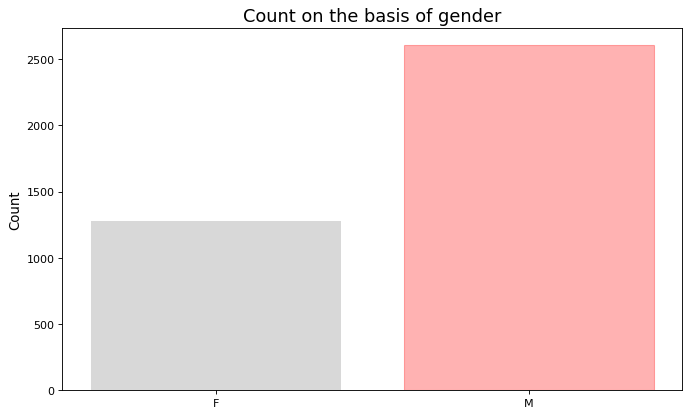

In [28]:
individuals_grouped_gender = individuals_df.groupby('gender')
individuals_grouped_gender = pd.DataFrame(individuals_grouped_gender.size().reset_index(name = "count"))
individuals_grouped_gender.head()
plt.figure(figsize=(10,6), dpi=80)
barlist = plt.bar(individuals_grouped_gender['gender'], individuals_grouped_gender['count'], align = 'center', color='grey', alpha=0.3)
barlist[1].set_color('r')
plt.ylabel('Count', size=12)
plt.title('Count on the basis of gender', size=16)
plt.show()

In [29]:
individuals_grouped_date = individuals_df.groupby('diagnosed_date')
individuals_grouped_date = pd.DataFrame(individuals_grouped_date.size().reset_index(name = "count"))
individuals_grouped_date[['Day','Month','Year']] = individuals_grouped_date.diagnosed_date.apply( 
   lambda x: pd.Series(str(x).split("/")))
individuals_grouped_date.sort_values(by=['Year','Month','Day'], inplace = True, ascending = True)
individuals_grouped_date.reset_index(inplace = True)
individuals_grouped_date['Cumulative Count'] = individuals_grouped_date['count'].cumsum()
individuals_grouped_date = individuals_grouped_date.drop(['index', 'Day', 'Month', 'Year'], axis = 1)
individuals_grouped_date.head()

,diagnosed_date,count,Cumulative Count
0,30/01/2020,1,1
1,02/02/2020,1,2
2,03/02/2020,1,3
3,02/03/2020,2,5
4,03/03/2020,1,6


In [31]:
individuals_grouped_date.tail()

,diagnosed_date,count,Cumulative Count
48,16/04/2020,1061,13431
49,17/04/2020,922,14353
50,18/04/2020,1371,15724
51,19/04/2020,1580,17304
52,20/04/2020,728,18032


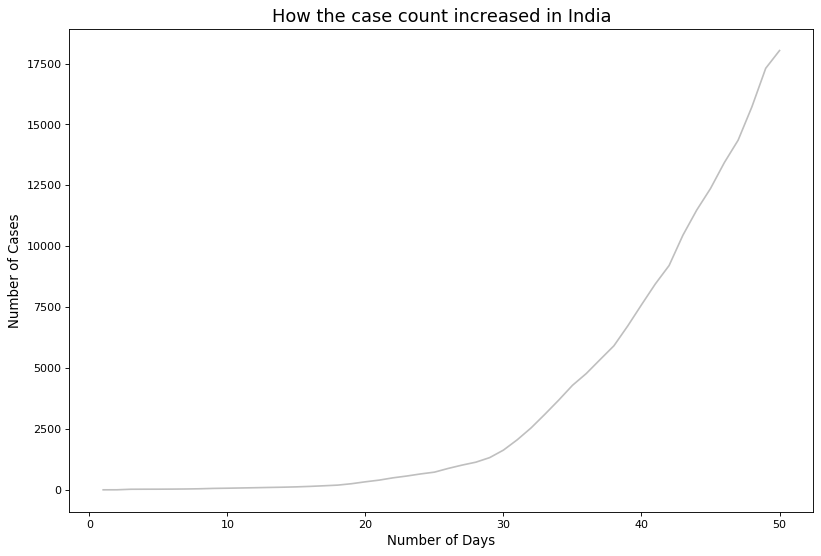

In [32]:
individuals_grouped_date = individuals_grouped_date.iloc[3:]
individuals_grouped_date.reset_index(inplace = True)
individuals_grouped_date.columns = ['Day Number', 'diagnosed_date', 'count', 'Cumulative Count']
individuals_grouped_date['Day Number'] = individuals_grouped_date['Day Number'] - 2
individuals_grouped_date
plt.figure(figsize=(12,8), dpi=80)
plt.plot(individuals_grouped_date['Day Number'], individuals_grouped_date['Cumulative Count'], color="grey", alpha = 0.5)
plt.xlabel('Number of Days', size = 12)
plt.ylabel('Number of Cases', size = 12)
plt.title('How the case count increased in India', size=16)
plt.show()

In [33]:
covid19_maharashtra = covid19_df[covid19_df['State/UnionTerritory'] == "Maharashtra"]
covid19_maharashtra.head()
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra = covid19_maharashtra.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_maharashtra['Day Count'] = covid19_maharashtra['Day Count'] + 8
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,8)],
                  "Date": ["0"+str(x)+"/03/20" for x in range(2,9)],
                  "State/UnionTerritory": ["Maharashtra"]*7,
                  "Deaths": [0]*7,
                  "Confirmed": [0]*7})
covid19_maharashtra = covid19_maharashtra.append(missing_values, ignore_index = True)
covid19_maharashtra = covid19_maharashtra.sort_values(by="Day Count", ascending = True)
covid19_maharashtra.reset_index(drop=True, inplace=True)
print(covid19_maharashtra.shape)
covid19_maharashtra.head()

(55, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Maharashtra,0,0
1,2,03/03/20,Maharashtra,0,0
2,3,04/03/20,Maharashtra,0,0
3,4,05/03/20,Maharashtra,0,0
4,5,06/03/20,Maharashtra,0,0


In [34]:
covid19_kerala = covid19_df[covid19_df['State/UnionTerritory'] == "Kerala"]
covid19_kerala = covid19_kerala.iloc[32:]
covid19_kerala.reset_index(inplace = True)
covid19_kerala = covid19_kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_kerala.reset_index(inplace = True)
covid19_kerala.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_kerala['Day Count'] = covid19_kerala['Day Count'] + 1
print(covid19_kerala.shape)
covid19_kerala.head()

(55, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Kerala,0,3
1,2,03/03/20,Kerala,0,3
2,3,04/03/20,Kerala,0,3
3,4,05/03/20,Kerala,0,3
4,5,06/03/20,Kerala,0,3


In [38]:
covid19_rajasthan = covid19_df[covid19_df['State/UnionTerritory'] == "Rajasthan"]
covid19_rajasthan.reset_index(inplace = True)
covid19_rajasthan = covid19_rajasthan.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_rajasthan.reset_index(inplace = True)
covid19_rajasthan.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_rajasthan['Day Count'] = covid19_rajasthan['Day Count'] + 2
missing_values = pd.DataFrame({"Day Count": [1],
                           "Date": ["02/03/20"],
                           "State/UnionTerritory": ["Rajasthan"],
                           "Deaths": [0],
                           "Confirmed": [0]})
covid19_rajasthan = covid19_rajasthan.append(missing_values, ignore_index = True)
covid19_rajasthan = covid19_rajasthan.sort_values(by="Day Count", ascending = True)
covid19_rajasthan.reset_index(drop=True, inplace=True)
print(covid19_rajasthan.shape)
covid19_rajasthan.head()

(55, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Rajasthan,0,0
1,2,03/03/20,Rajasthan,0,1
2,3,04/03/20,Rajasthan,0,15
3,4,05/03/20,Rajasthan,0,15
4,5,06/03/20,Rajasthan,0,15


In [39]:
covid19_gujarat = covid19_df[covid19_df['State/UnionTerritory'] == "Gujarat"]
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat = covid19_gujarat.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_gujarat['Day Count'] = covid19_gujarat['Day Count'] + 19
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State/UnionTerritory": ["Gujarat"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})
covid19_gujarat = covid19_gujarat.append(missing_values, ignore_index = True)
covid19_gujarat = covid19_gujarat.sort_values(by="Day Count", ascending = True)
covid19_gujarat.reset_index(drop=True, inplace=True)
print(covid19_gujarat.shape)
covid19_gujarat.head()

(55, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Gujarat,0,0
1,2,03/03/20,Gujarat,0,0
2,3,04/03/20,Gujarat,0,0
3,4,05/03/20,Gujarat,0,0
4,5,06/03/20,Gujarat,0,0


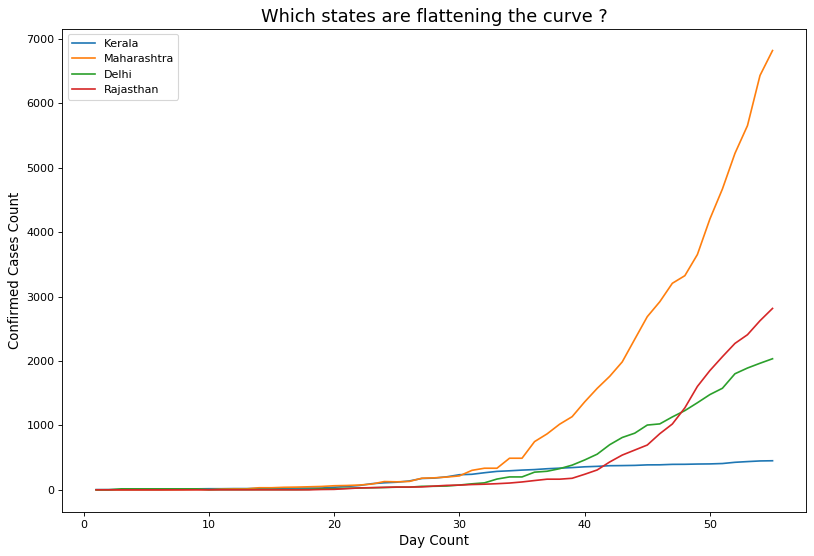

In [41]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(covid19_kerala['Day Count'], covid19_kerala['Confirmed'])
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['Confirmed'])
plt.plot(covid19_rajasthan['Day Count'], covid19_rajasthan['Confirmed'])
plt.plot(covid19_gujarat['Day Count'], covid19_gujarat['Confirmed'])
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Rajasthan', 'Gujarat'], loc='upper left')
plt.xlabel('Day Count', size=12)
plt.ylabel('Confirmed Cases Count', size=12)
plt.title('Which states are flattening the curve ?', size = 16)
plt.show()